In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import re
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [8]:
#Read dataset
train_data = pd.read_csv("./data/train_superset.csv")
test_data = pd.read_csv("./data/test_superset.csv")

In [9]:
pd.options.display.max_columns = None

In [10]:
train_data.head()

,flat_type,floor_area_sqm,monthly_rent,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
0,3,67.0,1600,51,0.699127,0.675002,0.334846,1.202674,0,1,3,7,0,5,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2545.918367,2598.586572
1,4,85.0,2400,51,0.683672,0.766322,0.476015,0.704576,0,1,6,17,2,6,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2694.867550,2665.573770
2,6,142.0,1800,51,1.231832,1.208124,0.213468,0.936378,0,0,2,3,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2507.070707,2502.392231
3,5,110.0,2100,51,0.299914,8.571923,0.444347,0.189552,1,1,5,8,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2594.417077,2542.742498
4,5,121.0,2750,51,0.445013,2.188344,0.618813,0.402451,2,3,2,10,2,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2897.785349,2870.273109


In [11]:
test_data.head()

,Id,flat_type,floor_area_sqm,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded,flat_model_3gen
0,0,5,121.0,53,0.820332,0.902017,0.149666,0.739402,0,1,2,7,1,3,92845.000,107889,77109,9.359630,10.440439,8.907474,2023,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2430.541012,2503.827247,0
1,1,4,100.0,52,0.307784,8.808284,0.143325,0.254920,1,1,5,8,2,3,92942.625,113299,64989,9.957011,11.604281,9.331596,2022,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2594.417077,2542.742498,0
2,2,4,91.0,53,1.097687,0.742112,1.040846,0.497667,0,0,0,4,1,4,104442.375,122110,82001,9.350660,10.057627,8.732712,2023,7,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2400.679348,2651.027703,0
3,3,3,74.0,51,0.362807,1.070222,1.075530,1.596401,1,1,0,8,0,4,51997.375,64901,40010,14.274470,16.307549,13.912863,2021,8,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572,0
4,4,5,121.0,52,0.448982,0.787797,0.714774,1.461486,1,1,3,5,0,5,79016.000,99010,48889,11.753082,14.020345,10.865200,2022,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572,0


In [12]:
len(test_data.columns), len(train_data.columns)

(45, 45)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59477 entries, 0 to 59476
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   flat_type                          59477 non-null  int64  
 1   floor_area_sqm                     59477 non-null  float64
 2   monthly_rent                       59477 non-null  int64  
 3   property_age                       59477 non-null  int64  
 4   nearest_mrt_exist                  59477 non-null  float64
 5   nearest_mrt_planned                59477 non-null  float64
 6   nearest_school                     59477 non-null  float64
 7   nearest_mall                       59477 non-null  float64
 8   mrt_within_0.5_km                  59477 non-null  int64  
 9   mrt_within_1_km                    59477 non-null  int64  
 10  school_within_1_km                 59477 non-null  int64  
 11  school_within_2_km                 59477 non-null  int

In [ ]:
# min_year = train_data['year'].min()
# train_data['year'] = train_data['year'] - min_year
# test_data['year'] = test_data['year'] - min_year

In [14]:
train_data.head()

,flat_type,floor_area_sqm,monthly_rent,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
0,3,67.0,1600,51,0.699127,0.675002,0.334846,1.202674,0,1,3,7,0,5,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2545.918367,2598.586572
1,4,85.0,2400,51,0.683672,0.766322,0.476015,0.704576,0,1,6,17,2,6,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2694.867550,2665.573770
2,6,142.0,1800,51,1.231832,1.208124,0.213468,0.936378,0,0,2,3,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2507.070707,2502.392231
3,5,110.0,2100,51,0.299914,8.571923,0.444347,0.189552,1,1,5,8,1,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2594.417077,2542.742498
4,5,121.0,2750,51,0.445013,2.188344,0.618813,0.402451,2,3,2,10,2,4,54951.625,70002,39000,14.986571,17.36298,14.337745,2021,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2897.785349,2870.273109


In [15]:
#Splitting into train test for further analysis
# train-test 80-20 split
df_train, df_val = train_test_split(train_data,
                                     train_size = 0.8,
                                     test_size = 0.2,
                                     random_state = 100)

In [16]:
df_train.shape, df_val.shape, test_data.shape

((47581, 45), (11896, 45), (30000, 45))

In [17]:
df_train.head()

,flat_type,floor_area_sqm,monthly_rent,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
41147,5,121.0,1500,51,0.708492,0.988849,0.159010,0.449148,0,1,5,10,2,6,52199.625,63002,41701,14.152774,16.571078,13.891529,2021,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2312.551440,2642.766006
18711,4,91.0,2600,51,0.406746,0.422217,0.479670,0.331025,2,2,2,5,4,4,50396.750,62100,36134,13.250911,16.250480,12.501900,2021,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2821.149144,2651.027703
27074,3,67.0,1700,53,0.998074,0.994500,0.629829,0.931079,0,1,5,10,1,3,92845.000,107889,77109,9.359630,10.440439,8.907474,2023,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2363.131936,2440.906571
12670,5,120.0,2150,51,0.699345,1.500724,0.368022,0.428953,0,1,6,14,2,8,45187.375,51900,35900,12.585338,14.739780,11.920820,2021,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2541.063596,2624.597383
47874,5,115.0,3350,52,1.896037,2.127675,0.298985,0.240401,0,0,2,10,3,6,79016.000,99010,48889,11.753082,14.020345,10.865200,2022,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2605.029586,2624.597383


In [18]:
df_val.head()

,flat_type,floor_area_sqm,monthly_rent,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
32698,3,60.0,3050,53,0.802418,2.969397,0.616828,0.541042,0,2,1,6,3,4,104442.375,122110,82001,9.350660,10.057627,8.732712,2023,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2848.250000,2907.009646
32997,4,92.0,2600,51,0.480853,0.504464,0.581499,1.367466,1,1,2,7,0,2,50698.375,61112,37000,13.545685,15.668549,12.971824,2021,6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2363.131936,2440.906571
3110,5,110.0,2950,52,0.592704,0.662679,0.375629,0.793012,0,1,9,16,2,7,77035.625,95901,50890,11.107664,14.475000,10.441912,2022,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2694.867550,2665.573770
12083,3,67.0,1950,51,0.515867,2.058319,0.418494,0.280861,0,3,6,13,4,6,45187.375,51900,35900,12.585338,14.739780,11.920820,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2603.869654,2639.750060
47230,6,143.0,3150,52,0.537062,2.978288,0.411166,1.676527,0,2,2,4,0,3,79016.000,99010,48889,11.753082,14.020345,10.865200,2022,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2521.146953,2440.906571


In [19]:
df_test=test_data
df_test.head()

,Id,flat_type,floor_area_sqm,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded,flat_model_3gen
0,0,5,121.0,53,0.820332,0.902017,0.149666,0.739402,0,1,2,7,1,3,92845.000,107889,77109,9.359630,10.440439,8.907474,2023,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2430.541012,2503.827247,0
1,1,4,100.0,52,0.307784,8.808284,0.143325,0.254920,1,1,5,8,2,3,92942.625,113299,64989,9.957011,11.604281,9.331596,2022,9,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2594.417077,2542.742498,0
2,2,4,91.0,53,1.097687,0.742112,1.040846,0.497667,0,0,0,4,1,4,104442.375,122110,82001,9.350660,10.057627,8.732712,2023,7,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2400.679348,2651.027703,0
3,3,3,74.0,51,0.362807,1.070222,1.075530,1.596401,1,1,0,8,0,4,51997.375,64901,40010,14.274470,16.307549,13.912863,2021,8,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572,0
4,4,5,121.0,52,0.448982,0.787797,0.714774,1.461486,1,1,3,5,0,5,79016.000,99010,48889,11.753082,14.020345,10.865200,2022,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572,0


In [20]:
df_train.shape, df_val.shape, df_test.shape

((47581, 45), (11896, 45), (30000, 45))

In [21]:
y_train = df_train.pop("monthly_rent")
X_train  = df_train
y_val = df_val.pop("monthly_rent")
X_val  = df_val
X_test = df_test

In [22]:
#Ensure the columsn are in same order as train ( they are different above)
X_test = X_test[X_train.columns]

In [23]:
X_test.shape, X_train.shape, y_train.shape,  X_val.shape, y_val.shape

((30000, 44), (47581, 44), (47581,), (11896, 44), (11896,))

In [ ]:
#Model on all features
model_all_features = RandomForestRegressor()
model_all_features.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#MSE on the training set
train_predictions_all_features = model_all_features.predict(X_train)
train_mse_all_features = mean_squared_error(y_train, train_predictions_all_features)
train_rmse_all_features = np.sqrt(train_mse_all_features)

#MSE on the validation set
val_predictions_all_features = model_all_features.predict(X_val)
val_mse_all_features = mean_squared_error(y_val, val_predictions_all_features)
val_rmse_all_features = np.sqrt(val_mse_all_features)

In [ ]:
train_rmse_all_features, val_rmse_all_features

(224.16365084162877, 515.2780256305488)

In [ ]:
X_train.head()

,flat_type,floor_area_sqm,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
41147,5,121.0,51,0.708492,0.988849,0.159010,0.449148,0,1,5,10,2,6,52199.625,63002,41701,14.152774,16.571078,13.891529,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2312.551440,2642.766006
18711,4,91.0,51,0.406746,0.422217,0.479670,0.331025,2,2,2,5,4,4,50396.750,62100,36134,13.250911,16.250480,12.501900,0,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2821.149144,2651.027703
27074,3,67.0,53,0.998074,0.994500,0.629829,0.931079,0,1,5,10,1,3,92845.000,107889,77109,9.359630,10.440439,8.907474,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2363.131936,2440.906571
12670,5,120.0,51,0.699345,1.500724,0.368022,0.428953,0,1,6,14,2,8,45187.375,51900,35900,12.585338,14.739780,11.920820,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2541.063596,2624.597383
47874,5,115.0,52,1.896037,2.127675,0.298985,0.240401,0,0,2,10,3,6,79016.000,99010,48889,11.753082,14.020345,10.865200,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2605.029586,2624.597383


In [ ]:
X_test.head()

,flat_type,floor_area_sqm,property_age,nearest_mrt_exist,nearest_mrt_planned,nearest_school,nearest_mall,mrt_within_0.5_km,mrt_within_1_km,school_within_1_km,school_within_2_km,malls_within_1_km,malls_within_2_km,mean_coe,max_coe,min_coe,last_month_mean,last_month_max,last_month_min,year,month,region_East Region,region_North Region,region_North-East Region,region_West Region,flat_model_3gen,flat_model_adjoined_flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_maisonette,flat_model_model_a,flat_model_model_a2,flat_model_model_a_maisonette,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1_s2,subzone_encoded,planning_area_encoded
0,5,121.0,53,0.820332,0.902017,0.149666,0.739402,0,1,2,7,1,3,92845.000,107889,77109,9.359630,10.440439,8.907474,2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2430.541012,2503.827247
1,4,100.0,52,0.307784,8.808284,0.143325,0.254920,1,1,5,8,2,3,92942.625,113299,64989,9.957011,11.604281,9.331596,1,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2594.417077,2542.742498
2,4,91.0,53,1.097687,0.742112,1.040846,0.497667,0,0,0,4,1,4,104442.375,122110,82001,9.350660,10.057627,8.732712,2,7,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2400.679348,2651.027703
3,3,74.0,51,0.362807,1.070222,1.075530,1.596401,1,1,0,8,0,4,51997.375,64901,40010,14.274470,16.307549,13.912863,0,8,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572
4,5,121.0,52,0.448982,0.787797,0.714774,1.461486,1,1,3,5,0,5,79016.000,99010,48889,11.753082,14.020345,10.865200,1,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2403.776435,2598.586572


In [ ]:
# Calculate MSE on the test set (Kaggle data)
test_predictions_all_features = model_all_features.predict(X_test)

In [ ]:
test_predictions_all_features

array([3104.5       , 2657.75      , 3387.5       , ..., 2778.25      ,
       3119.29166667, 3320.75      ])

In [ ]:
# Save the file
local_file_path = r"/content/drive/MyDrive/submission_RandomForest_upd.csv"

num_predictions = len(test_predictions_all_features)

# Generate unique IDs starting from 0
ids = list(range(num_predictions))

# Creating a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': ids, 'Predicted': test_predictions_all_features})

# Save the DataFrame to a CSV file in your local directory
submission_df.to_csv(local_file_path, index=False)

In [ ]:
#Step 2
# Get feature importances usning RandomForest
feature_importance_all_features = pd.Series(model_all_features.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Feature Importance (All Features):")
print(feature_importance_all_features)
print("Number of features:", len(feature_importance_all_features))

Feature Importance (All Features):
flat_type                            0.127071
min_coe                              0.079879
mean_coe                             0.079087
last_month_max                       0.071796
subzone_encoded                      0.068199
nearest_school                       0.062086
nearest_mrt_exist                    0.060284
nearest_mrt_planned                  0.059599
nearest_mall                         0.056605
last_month_mean                      0.053170
floor_area_sqm                       0.049250
max_coe                              0.043496
planning_area_encoded                0.031698
last_month_min                       0.031675
school_within_2_km                   0.022468
malls_within_2_km                    0.016379
school_within_1_km                   0.015185
month                                0.012785
malls_within_1_km                    0.009889
mrt_within_1_km                      0.009389
year                                 0.004600

**Cross Validation + RFE**

In [ ]:
#total number of columns in original dataset
len(X_train.columns)

44

In [ ]:
train_data.shape, test_data.shape

((59477, 45), (30000, 45))

In [ ]:
y_train = train_data.pop("monthly_rent")
X_train  = train_data
X_test = test_data

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((59477, 44), (59477,), (30000, 45))

In [ ]:
###K-fold

In [ ]:
# k-fold CV with RandomForestRegressor
lm = RandomForestRegressor()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)  # Use 'r2' scoring for RandomForestRegressor
scores

array([0.44794667, 0.4168792 , 0.49919485, 0.48369776, 0.39045702])

In [ ]:
#MSE based
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-298124.86511023, -130507.7578902 , -310094.23335977,
       -312191.71783722, -273898.11059787])

In [ ]:
# Create a cross-validation scheme
folds = KFold(n_splits=5, shuffle=True, random_state=50)

# Specify range of hyperparameters to tune for RFE
hyper_params = [{'n_features_to_select': [1,10,30]}]  # Reduced range for faster execution

# Create RandomForestRegressor model with specific hyperparameters
lm = RandomForestRegressor(n_estimators=50, max_depth=5,min_samples_leaf=5, max_features='sqrt', random_state=50)
lm.fit(X_train, y_train)
rfe = RFE(lm)


# call GridSearchCV() with r2score
model_cv_r2 = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# call GridSearchCV() with neg_mean_squared_error
model_cv_mse = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'neg_mean_squared_error',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

In [ ]:
model_cv_r2.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor(max_depth=5,
                                                           max_features='sqrt',
                                                           n_estimators=50,
                                                           random_state=50)),
             param_grid=[{'n_features_to_select': [1, 2, 4, 7, 9, 13, 15, 16,
                                                   19, 21, 23, 25, 26, 29, 32,
                                                   35, 36, 38, 40, 42]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results_r2 = pd.DataFrame(model_cv_r2.cv_results_)
cv_results_r2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,54.858902,0.262786,0.025095,0.005718,1,{'n_features_to_select': 1},0.288479,0.287019,0.305971,0.285782,0.293312,0.292113,0.007385,20,0.298462,0.292523,0.292412,0.294630,0.289790,0.293563,0.002891
1,53.718786,0.405437,0.021859,0.004832,2,{'n_features_to_select': 2},0.288655,0.292072,0.307071,0.289490,0.300210,0.295500,0.007082,19,0.298747,0.297204,0.293813,0.298085,0.295269,0.296623,0.001828
2,52.682009,0.876689,0.028300,0.001652,4,{'n_features_to_select': 4},0.419095,0.426607,0.432234,0.414019,0.429422,0.424275,0.006742,18,0.427920,0.425446,0.424871,0.428483,0.425110,0.426366,0.001520
3,50.932085,0.875880,0.033267,0.006521,7,{'n_features_to_select': 7},0.464449,0.469933,0.476075,0.462046,0.473594,0.469219,0.005308,9,0.474358,0.474809,0.471509,0.474847,0.469973,0.473099,0.001993
4,49.070966,0.933710,0.034537,0.005632,9,{'n_features_to_select': 9},0.464568,0.469607,0.478186,0.475135,0.476194,0.472738,0.004978,4,0.474947,0.473351,0.472526,0.487046,0.471949,0.475964,0.005632
5,45.933642,0.873951,0.033441,0.004679,13,{'n_features_to_select': 13},0.469661,0.474589,0.486228,0.464357,0.481617,0.475290,0.007891,2,0.481944,0.480223,0.478006,0.477904,0.478578,0.479331,0.001548
6,44.095097,0.649193,0.032635,0.005305,15,{'n_features_to_select': 15},0.463331,0.466862,0.480678,0.463900,0.475954,0.470145,0.006941,8,0.475477,0.473312,0.472780,0.475789,0.472886,0.474049,0.001310
7,45.534964,3.605279,0.034698,0.005855,16,{'n_features_to_select': 16},0.472923,0.476365,0.487205,0.469000,0.484079,0.477914,0.006799,1,0.485109,0.483752,0.479704,0.482251,0.481322,0.482428,0.001877
8,40.073857,0.445464,0.034204,0.004721,19,{'n_features_to_select': 19},0.467320,0.472388,0.484787,0.470285,0.480422,0.475040,0.006530,3,0.480422,0.479442,0.477609,0.481903,0.477716,0.479418,0.001634
9,37.547494,0.442691,0.038485,0.009546,21,{'n_features_to_select': 21},0.463571,0.469456,0.480782,0.465634,0.476539,0.471197,0.006520,5,0.476910,0.476146,0.473145,0.477531,0.472980,0.475342,0.001913


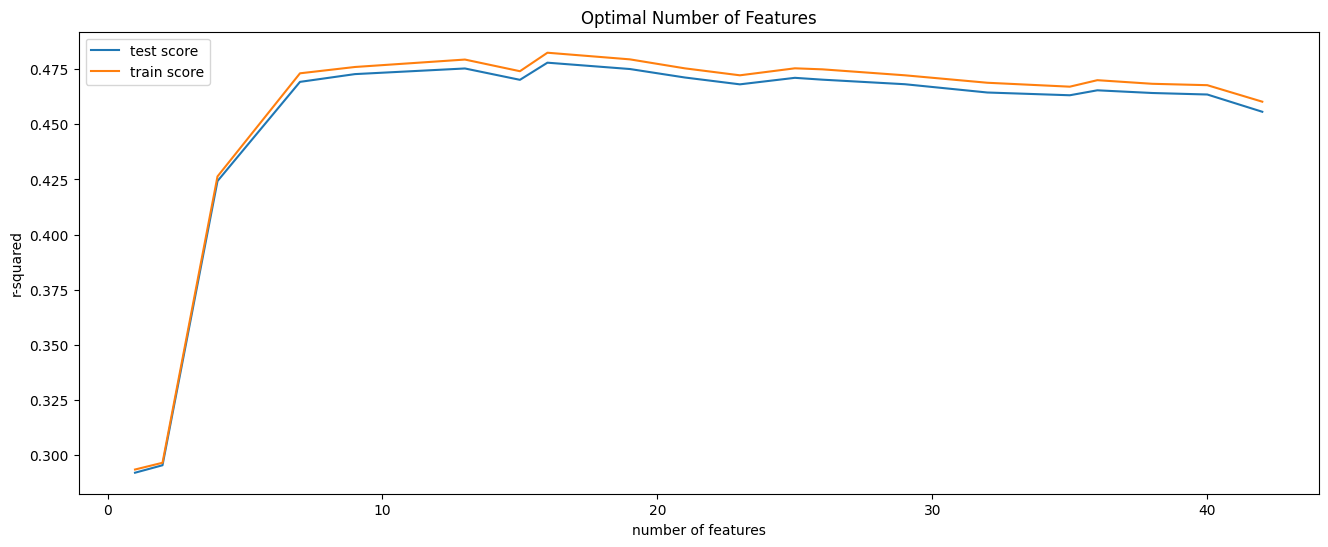

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_r2["param_n_features_to_select"], cv_results_r2["mean_test_score"])
plt.plot(cv_results_r2["param_n_features_to_select"], cv_results_r2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
model_cv_mse.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor(max_depth=5,
                                                           max_features='sqrt',
                                                           n_estimators=50,
                                                           random_state=50)),
             param_grid=[{'n_features_to_select': [1, 2, 4, 7, 9, 13, 15, 16,
                                                   19, 21, 23, 25, 26, 29, 32,
                                                   35, 36, 38, 40, 42]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
cv_results_mse = pd.DataFrame(model_cv_mse.cv_results_)
cv_results_mse

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,53.924247,0.647772,0.020517,0.005256,1,{'n_features_to_select': 1},-366795.022001,-365156.287334,-350721.387761,-369138.683423,-358512.048895,-362064.685883,6682.322386,20,-358121.204025,-361748.040479,-363021.328151,-359833.908733,-363987.147285,-361342.325735,2127.424806
1,52.746384,1.003572,0.019135,0.004764,2,{'n_features_to_select': 2},-366704.298488,-362568.516087,-350165.937930,-367221.945638,-355012.888485,-360334.717326,6704.047606,19,-357975.807740,-359354.754409,-362302.644866,-358071.798882,-361178.936939,-359776.788567,1713.161096
2,52.452636,0.726657,0.025400,0.000443,4,{'n_features_to_select': 4},-299461.778227,-293665.789576,-286915.582456,-302860.059911,-289461.750756,-294472.992185,5968.407656,18,-292035.578537,-293782.114736,-295064.575050,-291550.862576,-294634.414221,-293413.509024,1394.320115
3,50.738823,0.925372,0.030180,0.004252,7,{'n_features_to_select': 7},-276081.356327,-271476.279659,-264760.833485,-278038.009796,-267052.833219,-271481.862497,5077.932126,9,-268329.683051,-268541.410101,-271137.415102,-267898.867440,-271642.067073,-269509.888553,1557.000480
4,49.046592,0.546172,0.032728,0.005479,9,{'n_features_to_select': 9},-276019.714181,-271643.043571,-263694.360641,-271272.604449,-265733.770203,-269672.698609,4426.787695,4,-268029.155103,-269286.960811,-270615.628863,-261675.816538,-270629.406651,-268047.393593,3328.557571
5,45.337298,0.797340,0.030173,0.004180,13,{'n_features_to_select': 13},-273394.221187,-269091.752928,-259630.510207,-276843.165727,-262982.419915,-268388.413993,6371.205049,2,-264457.436231,-265773.359432,-267803.922452,-266339.716736,-267231.992808,-266321.285532,1166.370174
6,43.938222,0.540360,0.030165,0.003439,15,{'n_features_to_select': 15},-276657.794100,-273049.115838,-262434.808806,-277079.363417,-265855.731905,-271015.362813,5882.057186,8,-267758.576025,-269307.212047,-270485.134151,-267418.340674,-270149.241431,-269023.700866,1237.798821
7,43.008628,0.772704,0.035297,0.005524,16,{'n_features_to_select': 16},-271712.782893,-268181.935729,-259136.719798,-274443.840032,-261733.603118,-267041.776314,5806.469399,1,-262841.743899,-263968.763789,-266932.665307,-264122.128951,-265825.551853,-264738.170760,1453.694149
8,40.416173,1.274598,0.032498,0.004057,19,{'n_features_to_select': 19},-274601.225955,-270219.066921,-260358.344273,-273779.685155,-263588.850731,-268509.434607,5629.577686,3,-265234.417702,-266172.739714,-268007.986930,-264299.744397,-267673.995021,-266277.776753,1411.048943
9,39.124694,0.418814,0.033690,0.004837,21,{'n_features_to_select': 21},-276533.702994,-271720.603920,-262382.413810,-276183.237491,-265558.646807,-270475.721004,5665.754384,5,-267026.971991,-267857.746341,-270298.120263,-266529.729459,-270100.959433,-268362.705497,1559.892686


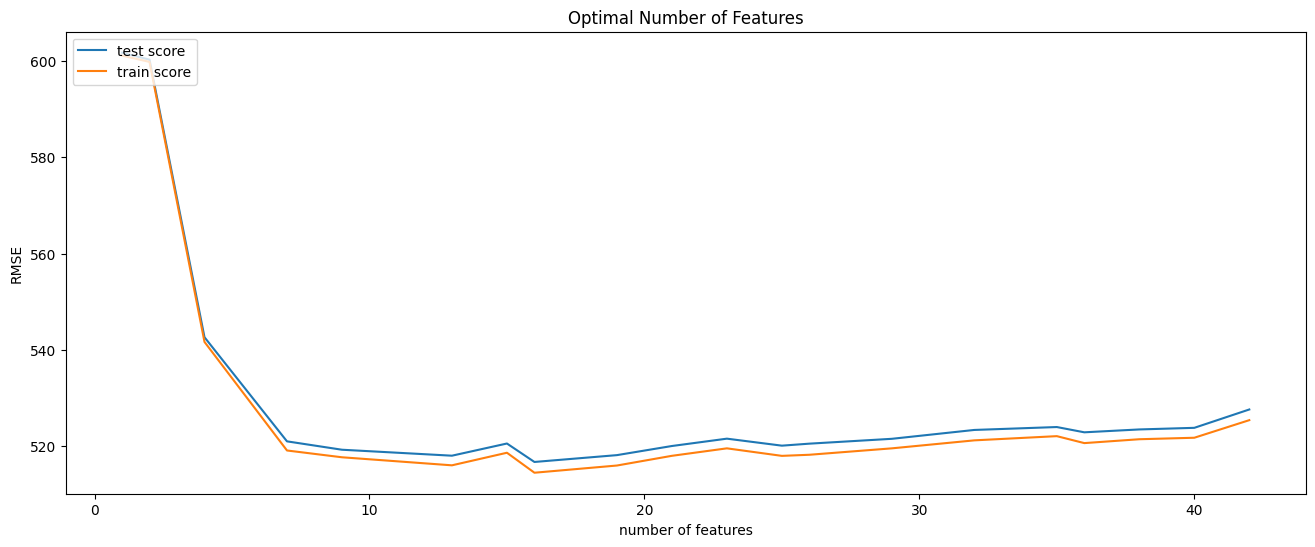

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results_mse["param_n_features_to_select"], np.sqrt(-cv_results_mse["mean_test_score"]))
plt.plot(cv_results_mse["param_n_features_to_select"], np.sqrt(-cv_results_mse["mean_train_score"]))
plt.xlabel('number of features')
plt.ylabel('RMSE')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
# Assuming cv_results_rmse is your cross-validation results containing RMSE values
num_features = cv_results_mse["param_n_features_to_select"]
rmse_scores = np.sqrt(-cv_results_mse["mean_test_score"])

# Find the index of the minimum RMSE score
optimal_num_features_index = np.argmin(rmse_scores)

# Get the optimal number of features
optimal_num_features = num_features[optimal_num_features_index]
min_rmse_score = rmse_scores[optimal_num_features_index]

print(f"Optimal number of features:{optimal_num_features} and minimum test mean rmse score : {min_rmse_score}")

Optimal number of features:16 and minimum test mean rmse score : 516.7608502140221


In [ ]:
# final model
n_features_optimal = 16

lm = RandomForestRegressor(n_estimators=50, max_depth=5,min_samples_leaf=5, max_features='sqrt', random_state=50)
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)
rfe = rfe.fit(X_train, y_train)

In [ ]:
selected_feature_indices = np.where(rfe.support_)[0]

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices] #Will be same as original for RF model

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['flat_type', 'floor_area_sqm', 'property_age', 'nearest_mrt_exist',
       'nearest_mrt_planned', 'nearest_school', 'nearest_mall',
       'mrt_within_0.5_km', 'mrt_within_1_km', 'school_within_1_km',
       'school_within_2_km', 'malls_within_1_km', 'malls_within_2_km',
       'mean_coe', 'max_coe', 'min_coe', 'last_month_mean', 'last_month_max',
       'last_month_min', 'year', 'month', 'region_East Region',
       'region_North Region', 'region_North-East Region', 'region_West Region',
       'flat_model_3gen', 'flat_model_adjoined_flat', 'flat_model_apartment',
       'flat_model_dbss', 'flat_model_improved', 'flat_model_maisonette',
       'flat_model_model_a', 'flat_model_model_a2',
       'flat_model_model_a_maisonette', 'flat_model_new_generation',
       'flat_model_premium_apartment', 'flat_model_premium_apartment_loft',
       'flat_model_premium_maisonette', 'flat_model_simplified',
       'flat_model_standard', 'flat_model_terrace', 'flat_model_ty

In [ ]:
# Create RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model with selected features
model.fit(X_train[selected_features], y_train)

# Get the feature importance values
feature_importance = model.feature_importances_

# Create a DataFrame with selected features and their importance values
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})

# Sort features by importance
sorted_features_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Assign ranks to the sorted features
sorted_features_df['Rank'] = sorted_features_df.index + 1

# Print the DataFrame
print("Selected Features and Feature Importance:")
print(sorted_features_df)

Selected Features and Feature Importance:
                              Feature  Importance  Rank
0                           flat_type    0.127138     1
1                             min_coe    0.098445     2
2                            mean_coe    0.087538     3
3                      last_month_max    0.066723     4
4                      nearest_school    0.061889     5
5                     subzone_encoded    0.061413     6
6                   nearest_mrt_exist    0.061296     7
7                 nearest_mrt_planned    0.060357     8
8                        nearest_mall    0.057455     9
9                      floor_area_sqm    0.048207    10
10                            max_coe    0.046357    11
11              planning_area_encoded    0.038658    12
12                    last_month_mean    0.030265    13
13                     last_month_min    0.029624    14
14                 school_within_2_km    0.021346    15
15                  malls_within_2_km    0.015769    16
16    

In [ ]:
# Calculate MSE on the test set (Kaggle data)
predictions = model.predict(X_test[selected_features])

In [ ]:
rounded_predictions = np.round(predictions / 10) * 10

In [ ]:
# Save the file
local_file_path = r"./data/rounder_predictions_20F.csv"

num_predictions = len(rounded_predictions)

# Generate unique IDs starting from 0
ids = list(range(num_predictions))

# Create a DataFrame with 'Id' and 'Predicted' columns
submission_df = pd.DataFrame({'Id': ids, 'Predicted': rounded_predictions})

# Save the DataFrame to a CSV file locally
submission_df.to_csv(local_file_path, index=False)